In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt
from nltk import corpus


In [3]:
url = "https://hundred.org/en/collections/hundred-2021"

response = requests.get(url)
headers = response.headers
body = response.text


In [4]:
soup = BeautifulSoup(body, "html.parser")
mainLink= "https://hundred.org/"
links = []
for link in soup.findAll('a', attrs={'href': re.compile("/en/innovations/")}):
        links.append(link.get('href'))

links= list(set(links))
print(links)
print(len(links))

['/en/innovations/0-aflatoun-international', '/en/innovations/inside-out-we-all-belong', '/en/innovations/ubongo', '/en/innovations/little-ripples', '/en/innovations/aula-42', '/en/innovations/leerkracht-teachingforce', '/en/innovations/agora', '/en/innovations/beep-lab-design-mentoring-to-spark-creativity-innovation-for-kids', '/en/innovations/remake-learning-days-across-america', '/en/innovations/inhive', '/en/innovations/genius-lab', '/en/innovations/onesky-for-all-children', '/en/innovations/cell-ed-school-life-and-work-readiness-mobile-platform', '/en/innovations/xtalksworldlistens', '/en/innovations/onecourse', '/en/innovations/empowerment-and-digital-wellness', '/en/innovations/kolibri', '/en/innovations/amaze-org', '/en/innovations/teaching-tolerance', '/en/innovations/protsahan-s-heart-program', '/en/innovations/design-for-change', '/en/innovations/chatta', '/en/innovations/kide-science', '/en/innovations/school-day', '/en/innovations/global-oneness-project', '/en/innovations/

In [5]:
url = "https://hundred.org/en/collections/hundred-2022"

response = requests.get(url)
headers = response.headers
body = response.text


In [6]:
links2 = []
for link in soup.findAll('a', attrs={'href': re.compile("/en/innovations/")}):
        links2.append(link.get('href'))

links2= list(set(links2))
print(links2)
print(len(links2))

['/en/innovations/0-aflatoun-international', '/en/innovations/inside-out-we-all-belong', '/en/innovations/ubongo', '/en/innovations/little-ripples', '/en/innovations/aula-42', '/en/innovations/leerkracht-teachingforce', '/en/innovations/agora', '/en/innovations/beep-lab-design-mentoring-to-spark-creativity-innovation-for-kids', '/en/innovations/remake-learning-days-across-america', '/en/innovations/inhive', '/en/innovations/genius-lab', '/en/innovations/onesky-for-all-children', '/en/innovations/cell-ed-school-life-and-work-readiness-mobile-platform', '/en/innovations/xtalksworldlistens', '/en/innovations/onecourse', '/en/innovations/empowerment-and-digital-wellness', '/en/innovations/kolibri', '/en/innovations/amaze-org', '/en/innovations/teaching-tolerance', '/en/innovations/protsahan-s-heart-program', '/en/innovations/design-for-change', '/en/innovations/chatta', '/en/innovations/kide-science', '/en/innovations/school-day', '/en/innovations/global-oneness-project', '/en/innovations/

In [7]:
links = links + links2
print(len(links))

200


In [8]:
print(links)

['/en/innovations/0-aflatoun-international', '/en/innovations/inside-out-we-all-belong', '/en/innovations/ubongo', '/en/innovations/little-ripples', '/en/innovations/aula-42', '/en/innovations/leerkracht-teachingforce', '/en/innovations/agora', '/en/innovations/beep-lab-design-mentoring-to-spark-creativity-innovation-for-kids', '/en/innovations/remake-learning-days-across-america', '/en/innovations/inhive', '/en/innovations/genius-lab', '/en/innovations/onesky-for-all-children', '/en/innovations/cell-ed-school-life-and-work-readiness-mobile-platform', '/en/innovations/xtalksworldlistens', '/en/innovations/onecourse', '/en/innovations/empowerment-and-digital-wellness', '/en/innovations/kolibri', '/en/innovations/amaze-org', '/en/innovations/teaching-tolerance', '/en/innovations/protsahan-s-heart-program', '/en/innovations/design-for-change', '/en/innovations/chatta', '/en/innovations/kide-science', '/en/innovations/school-day', '/en/innovations/global-oneness-project', '/en/innovations/

In [9]:
websiteLinks = list()
for element in links:
        url = mainLink + element
        response = requests.get(url)
        if(response.status_code == 200):
                headers = response.headers
                body = response.text
                soup = BeautifulSoup(body, "html.parser")
                for link in soup.find_all('a', class_="contact-icon www"):
                        websiteLinks.append(link.get('href'))

print(websiteLinks)

['https://www.aflatoun.org', 'https://unidirectory.auckland.ac.nz/profile/j-fenaughty', 'https://www.ubongo.org/', 'https://iactivism.org', 'https://www.aula42.org', 'https://stichting-leerkracht.nl/', 'http://www.robhouben.com', 'https://wingsroermond.nl/agora', 'https://www.beeplab.asia', 'https://remakelearningdays.org', 'http://www.inhiveglobal.org', 'http://www.tcgcsys.com/', 'https://onesky.org/', 'https://www.cell-ed.com', 'https://linktr.ee/AlexBell', 'https://www.xtalksworldlistens.org', 'https://onebillion.org', 'https://www.icanhelp.net/', 'https://learningequality.org/kolibri/', 'https://amaze.org/our-team/', 'https://www.tolerance.org/', 'https://protsahan.co.in', 'http://www.dfcworld.com/#', 'https://chattalearning.com/', 'https://kidescience.com', 'https://www.schoolday.com', 'https://www.globalonenessproject.org/', 'https://lab4u.co/en/home/', 'https://www.communityshare.us', 'https://www.projectrockit.com.au/', 'http://www.climate-action.info/', 'https://www.edcamp.org

In [10]:
text = ""
for link in websiteLinks:
   try:
      url = link
      response = requests.get(url)
      if(response.status_code == 200):
         headers = response.headers
         body = response.text
         soup = BeautifulSoup(body, "html.parser")
         text += soup.getText()
   except:
      print("Failed to connect to: " + link)
      continue


Failed to connect to: https://www.aula42.org
Failed to connect to: http://www.dfcworld.com/#
Failed to connect to: https://www.edcamp.org
Failed to connect to: https://www.education.squawksquad.co.nz/
Failed to connect to: https://www.aula42.org
Failed to connect to: http://www.dfcworld.com/#
Failed to connect to: https://www.edcamp.org
Failed to connect to: https://www.education.squawksquad.co.nz/


Text Cleaning

In [30]:
stopWords = STOPWORDS
stopWords.add("æ")
stopWords.add("s")
stopWords.add("ȧ")
stopWords.add("ç")
stopWords.add("å")
stopWords.add("é")
stopWords.add("y")
stopWords.add("1¼")
stopWords.add("u")
stopWords.add("è")
stopWords.add("ã")
wordCloud = WordCloud(stopwords=stopWords, width=800, height=400)
wordCloud.generate(text.lower())

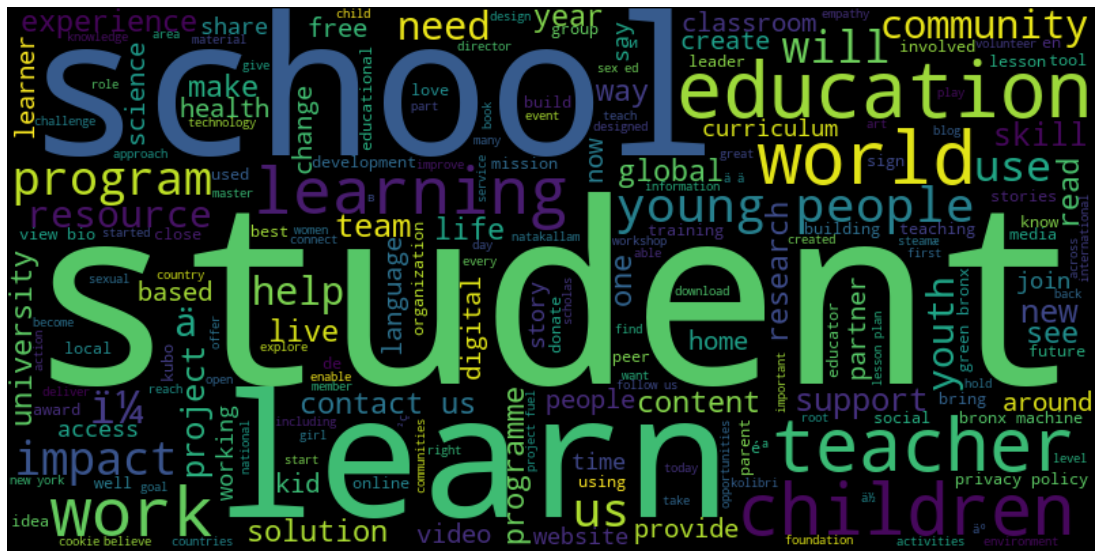

In [31]:
plt.figure(figsize=[20,10])
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [32]:
wordCloud.to_file("WordCloud.png")